# Pattern prediction for long-term strategies

#### Packages required

In [147]:
import pandas as pd
import numpy as np
import math
import statistics as st
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("../datasets/indian_stock_indices/Stock_Indices.xlsx")

In [3]:
df.head()

,Date,SENSEX,NIFTY50,NIFTY_CONSUMPTION
0,2014-01-01,21140.48,6323.80,2590.000000
1,2014-01-02,20888.33,6301.25,2544.649902
2,2014-01-03,20851.33,6194.55,2546.949951
3,2014-01-06,20787.30,6220.85,2544.649902
4,2014-01-07,20693.24,6203.90,2543.399902


In [4]:
total_size = 2469

train_size = 1728 # Training data of 7 years (01-01-2014 to 31-12-2020)
test_size = 741 # Testing data of 3 years (01-01-2021 to 31-12-2023)

In [279]:
window_size = 25

sensex_graph_lists = []
nifty_graph_lists = []
niftyc_graph_lists = []

sensex_closing_prices = []
nifty_closing_prices = []
niftyc_closing_prices = []

i = 0
j = window_size

while j < total_size:
    k = i
    
    sensex_graph_list = []
    nifty_graph_list = []
    niftyc_graph_list = []

    while k <= j:
        sensex_graph_list.append(df['SENSEX'][k])
        nifty_graph_list.append(df['NIFTY50'][k])
        niftyc_graph_list.append(df['NIFTY_CONSUMPTION'][k])
        
        k += 1
    sensex_graph_lists.append(sensex_graph_list)
    nifty_graph_lists.append(nifty_graph_list)
    niftyc_graph_lists.append(niftyc_graph_list)
    
    sensex_closing_prices.append(df['SENSEX'][j])
    nifty_closing_prices.append(df['NIFTY50'][j])
    niftyc_closing_prices.append(df['NIFTY_CONSUMPTION'][j])
    
    i += 1
    j += 1

In [280]:
print(len(sensex_graph_lists[0]))

26


In [281]:
print(len(sensex_closing_prices))

2254


In [282]:
N = 5 # N-day returns

sensex_N_day_returns = []
nifty_N_day_returns = []
niftyc_N_day_returns = []

sensex_volatis = []
nifty_volatis = []
niftyc_volatis = []

for (sensex_graph_list, nifty_graph_list, niftyc_graph_list) in (zip(sensex_graph_lists, nifty_graph_lists, niftyc_graph_lists)):
    
    sensex_returns = []
    nifty_returns = []
    niftyc_returns = []
    
    sensex_vol = []
    nifty_vol = []
    niftyc_vol = []
    
    i = 0
    j = i + 1
    k = i + N    
    
    while k < window_size:
        sensex_ret = math.log(sensex_graph_list[k] / sensex_graph_list[i])
        nifty_ret = math.log(nifty_graph_list[k] / nifty_graph_list[i])
        niftyc_ret = math.log(niftyc_graph_list[k] / niftyc_graph_list[i])
        
        sensex_returns.append(sensex_ret)
        nifty_returns.append(nifty_ret)
        niftyc_returns.append(niftyc_ret)
        
        i += 1
        k += 1
    sensex_N_day_returns.append(sensex_returns)
    nifty_N_day_returns.append(nifty_returns)
    niftyc_N_day_returns.append(niftyc_returns)
    
    i = j - 1
    
    while j < window_size:
        sensex_returns = []
        nifty_returns = []
        niftyc_returns = []
        
        a = i
        b = j
        
        itr = 0
        while b < window_size and itr < N:
            r1 = math.log(sensex_graph_list[b] / sensex_graph_list[a])
            r2 = math.log(nifty_graph_list[b] / nifty_graph_list[a])
            r3 = math.log(niftyc_graph_list[b] / niftyc_graph_list[a])
            
            sensex_returns.append(r1)
            nifty_returns.append(r2)
            niftyc_returns.append(r3)
            
            itr += 1
            
            a += 1
            b += 1
        
        if itr == N:
            vol1 = st.stdev(sensex_returns) * math.sqrt(N)
            vol2 = st.stdev(nifty_returns) * math.sqrt(N)
            vol3 = st.stdev(niftyc_returns) * math.sqrt(N)
    
            sensex_vol.append(vol1)
            nifty_vol.append(vol2)
            niftyc_vol.append(vol3)
        
        j += 1
        i += 1
    sensex_volatis.append(sensex_vol)
    nifty_volatis.append(nifty_vol)
    niftyc_volatis.append(niftyc_vol) 

In [283]:
print(len(sensex_volatis[0]))

20


In [284]:
# print(len(sensex_volatis))
# print(len(sensex_N_day_returns))
# print(len(sensex_closing_prices))

In [285]:
total_size = len(sensex_volatis)

In [286]:
train_size = 0.75
test_size = 1 - train_size

In [287]:
train_sensex_volatis = []
train_nifty_volatis = []
train_niftyc_volatis = []

train_sensex_N_day_returns = []
train_nifty_N_day_returns = []
train_niftyc_N_day_returns = []

train_sensex_closing_prices = []
train_nifty_closing_prices = []
train_niftyc_closing_prices = []

In [288]:
test_sensex_volatis = []
test_nifty_volatis = []
test_niftyc_volatis = []

test_sensex_N_day_returns = []
test_nifty_N_day_returns = []
test_niftyc_N_day_returns = []

test_sensex_closing_prices = []
test_nifty_closing_prices = []
test_niftyc_closing_prices = []

In [289]:
for i in range(int(0.75 * total_size)):
    train_sensex_volatis.append(sensex_volatis[i])
    train_nifty_volatis.append(nifty_volatis[i])
    train_niftyc_volatis.append(niftyc_volatis[i])

    train_sensex_N_day_returns.append(sensex_N_day_returns[i])
    train_nifty_N_day_returns.append(nifty_N_day_returns[i])
    train_niftyc_N_day_returns.append(niftyc_N_day_returns[i])

    train_sensex_closing_prices.append(sensex_closing_prices[i])
    train_nifty_closing_prices.append(nifty_closing_prices[i])
    train_niftyc_closing_prices.append(niftyc_closing_prices[i])

In [290]:
for i in range(int(0.75 * total_size), total_size):
    test_sensex_volatis.append(sensex_volatis[i])
    test_nifty_volatis.append(nifty_volatis[i])
    test_niftyc_volatis.append(niftyc_volatis[i])

    test_sensex_N_day_returns.append(sensex_N_day_returns[i])
    test_nifty_N_day_returns.append(nifty_N_day_returns[i])
    test_niftyc_N_day_returns.append(niftyc_N_day_returns[i])

    test_sensex_closing_prices.append(sensex_closing_prices[i])
    test_nifty_closing_prices.append(nifty_closing_prices[i])
    test_niftyc_closing_prices.append(niftyc_closing_prices[i])

In [291]:
# print(len(train_sensex_volatis))

In [292]:
# print(len(train_sensex_volatis))
# print(len(test_sensex_volatis))
print(len(train_sensex_volatis[1]))
print(len(train_sensex_N_day_returns[1]))

20
20


In [293]:
train_pattern_graphs = []

for i in range(int(train_size * total_size)):
    train_sensex_volatis_avg = np.average(train_sensex_volatis[i])
    train_nifty_volatis_avg = np.average(train_nifty_volatis[i])
    train_niftyc_volatis_avg = np.average(train_niftyc_volatis[i])
    
#     print("Done")
    shape = (64, 64)
    graph = np.zeros(shape)
    
    list_size = len(train_sensex_volatis[i])
    
    for j in range(list_size):
        if train_sensex_N_day_returns[i][j] >= 0 and train_sensex_volatis[i][j] >= train_sensex_volatis_avg:
            prev_sensex_node = 0
        if train_sensex_N_day_returns[i][j] >= 0 and train_sensex_volatis[i][j] < train_sensex_volatis_avg:
            prev_sensex_node = 1
        if train_sensex_N_day_returns[i][j] < 0 and train_sensex_volatis[i][j] >= train_sensex_volatis_avg:
            prev_sensex_node = 2
        if train_sensex_N_day_returns[i][j] < 0 and train_sensex_volatis[i][j] < train_sensex_volatis_avg:
            prev_sensex_node = 3
            
        if train_nifty_N_day_returns[i][j] >= 0 and train_nifty_volatis[i][j] >= train_nifty_volatis_avg:
            prev_nifty_node = 0
        if train_nifty_N_day_returns[i][j] >= 0 and train_nifty_volatis[i][j] < train_nifty_volatis_avg:
            prev_nifty_node = 1
        if train_nifty_N_day_returns[i][j] < 0 and train_nifty_volatis[i][j] >= train_nifty_volatis_avg:
            prev_nifty_node = 2
        if train_nifty_N_day_returns[i][j] < 0 and train_nifty_volatis[i][j] < train_nifty_volatis_avg:
            prev_nifty_node = 3
        
        if train_niftyc_N_day_returns[i][j] >= 0 and train_niftyc_volatis[i][j] >= train_niftyc_volatis_avg:
            prev_niftyc_node = 0
        if train_niftyc_N_day_returns[i][j] >= 0 and train_niftyc_volatis[i][j] < train_niftyc_volatis_avg:
            prev_niftyc_node = 1
        if train_niftyc_N_day_returns[i][j] < 0 and train_niftyc_volatis[i][j] >= train_niftyc_volatis_avg:
            prev_niftyc_node = 2
        if train_niftyc_N_day_returns[i][j] < 0 and train_niftyc_volatis[i][j] < train_niftyc_volatis_avg:
            prev_niftyc_node = 3
            
        if j + 1 < list_size:
            if train_sensex_N_day_returns[i][j + 1] >= 0 and train_sensex_volatis[i][j + 1] >= train_sensex_volatis_avg:
                next_sensex_node = 0
            if train_sensex_N_day_returns[i][j + 1] >= 0 and train_sensex_volatis[i][j + 1] < train_sensex_volatis_avg:
                next_sensex_node = 1
            if train_sensex_N_day_returns[i][j + 1] < 0 and train_sensex_volatis[i][j + 1] >= train_sensex_volatis_avg:
                next_sensex_node = 2
            if train_sensex_N_day_returns[i][j + 1] < 0 and train_sensex_volatis[i][j + 1] < train_sensex_volatis_avg:
                next_sensex_node = 3

            if train_nifty_N_day_returns[i][j + 1] >= 0 and train_nifty_volatis[i][j + 1] >= train_nifty_volatis_avg:
                next_nifty_node = 0
            if train_nifty_N_day_returns[i][j + 1] >= 0 and train_nifty_volatis[i][j + 1] < train_nifty_volatis_avg:
                next_nifty_node = 1
            if train_nifty_N_day_returns[i][j + 1] < 0 and train_nifty_volatis[i][j + 1] >= train_nifty_volatis_avg:
                next_nifty_node = 2
            if train_nifty_N_day_returns[i][j + 1] < 0 and train_nifty_volatis[i][j + 1] < train_nifty_volatis_avg:
                next_nifty_node = 3

            if train_niftyc_N_day_returns[i][j + 1] >= 0 and train_niftyc_volatis[i][j + 1] >= train_niftyc_volatis_avg:
                next_niftyc_node = 0
            if train_niftyc_N_day_returns[i][j + 1] >= 0 and train_niftyc_volatis[i][j + 1] < train_niftyc_volatis_avg:
                next_niftyc_node = 1
            if train_niftyc_N_day_returns[i][j + 1] < 0 and train_niftyc_volatis[i][j + 1] >= train_niftyc_volatis_avg:
                next_niftyc_node = 2
            if train_niftyc_N_day_returns[i][j + 1] < 0 and train_niftyc_volatis[i][j + 1] < train_niftyc_volatis_avg:
                next_niftyc_node = 3

        prev_node = prev_sensex_node * (4 ** 0) + prev_nifty_node * (4 ** 1) + prev_niftyc_node * (4 ** 2)
        next_node = next_sensex_node * (4 ** 0) + next_nifty_node * (4 ** 1) + next_niftyc_node * (4 ** 2)
        
        graph[prev_node][next_node] += 1
    train_pattern_graphs.append(graph)

In [294]:
test_pattern_graphs = []

for i in range(int(test_size * total_size)):
    test_sensex_volatis_avg = np.average(test_sensex_volatis[i])
    test_nifty_volatis_avg = np.average(test_nifty_volatis[i])
    test_niftyc_volatis_avg = np.average(test_niftyc_volatis[i])
    
#     print("Done")
    shape = (64, 64)
    graph = np.zeros(shape)
    
    list_size = len(test_sensex_volatis[i])
    
    for j in range(list_size):
        if test_sensex_N_day_returns[i][j] >= 0 and test_sensex_volatis[i][j] >= test_sensex_volatis_avg:
            prev_sensex_node = 0
        if test_sensex_N_day_returns[i][j] >= 0 and test_sensex_volatis[i][j] < test_sensex_volatis_avg:
            prev_sensex_node = 1
        if test_sensex_N_day_returns[i][j] < 0 and test_sensex_volatis[i][j] >= test_sensex_volatis_avg:
            prev_sensex_node = 2
        if test_sensex_N_day_returns[i][j] < 0 and test_sensex_volatis[i][j] < test_sensex_volatis_avg:
            prev_sensex_node = 3
            
        if test_nifty_N_day_returns[i][j] >= 0 and test_nifty_volatis[i][j] >= test_nifty_volatis_avg:
            prev_nifty_node = 0
        if test_nifty_N_day_returns[i][j] >= 0 and test_nifty_volatis[i][j] < test_nifty_volatis_avg:
            prev_nifty_node = 1
        if test_nifty_N_day_returns[i][j] < 0 and test_nifty_volatis[i][j] >= test_nifty_volatis_avg:
            prev_nifty_node = 2
        if test_nifty_N_day_returns[i][j] < 0 and test_nifty_volatis[i][j] < test_nifty_volatis_avg:
            prev_nifty_node = 3
        
        if test_niftyc_N_day_returns[i][j] >= 0 and test_niftyc_volatis[i][j] >= test_niftyc_volatis_avg:
            prev_niftyc_node = 0
        if test_niftyc_N_day_returns[i][j] >= 0 and test_niftyc_volatis[i][j] < test_niftyc_volatis_avg:
            prev_niftyc_node = 1
        if test_niftyc_N_day_returns[i][j] < 0 and test_niftyc_volatis[i][j] >= test_niftyc_volatis_avg:
            prev_niftyc_node = 2
        if test_niftyc_N_day_returns[i][j] < 0 and test_niftyc_volatis[i][j] < test_niftyc_volatis_avg:
            prev_niftyc_node = 3
            
        if j + 1 < list_size:
            if test_sensex_N_day_returns[i][j + 1] >= 0 and test_sensex_volatis[i][j + 1] >= test_sensex_volatis_avg:
                next_sensex_node = 0
            if test_sensex_N_day_returns[i][j + 1] >= 0 and test_sensex_volatis[i][j + 1] < test_sensex_volatis_avg:
                next_sensex_node = 1
            if test_sensex_N_day_returns[i][j + 1] < 0 and test_sensex_volatis[i][j + 1] >= test_sensex_volatis_avg:
                next_sensex_node = 2
            if test_sensex_N_day_returns[i][j + 1] < 0 and test_sensex_volatis[i][j + 1] < test_sensex_volatis_avg:
                next_sensex_node = 3

            if test_nifty_N_day_returns[i][j + 1] >= 0 and test_nifty_volatis[i][j + 1] >= test_nifty_volatis_avg:
                next_nifty_node = 0
            if test_nifty_N_day_returns[i][j + 1] >= 0 and test_nifty_volatis[i][j + 1] < test_nifty_volatis_avg:
                next_nifty_node = 1
            if test_nifty_N_day_returns[i][j + 1] < 0 and test_nifty_volatis[i][j + 1] >= test_nifty_volatis_avg:
                next_nifty_node = 2
            if test_nifty_N_day_returns[i][j + 1] < 0 and test_nifty_volatis[i][j + 1] < test_nifty_volatis_avg:
                next_nifty_node = 3

            if test_niftyc_N_day_returns[i][j + 1] >= 0 and test_niftyc_volatis[i][j + 1] >= test_niftyc_volatis_avg:
                next_niftyc_node = 0
            if test_niftyc_N_day_returns[i][j + 1] >= 0 and test_niftyc_volatis[i][j + 1] < test_niftyc_volatis_avg:
                next_niftyc_node = 1
            if test_niftyc_N_day_returns[i][j + 1] < 0 and test_niftyc_volatis[i][j + 1] >= test_niftyc_volatis_avg:
                next_niftyc_node = 2
            if test_niftyc_N_day_returns[i][j + 1] < 0 and test_niftyc_volatis[i][j + 1] < test_niftyc_volatis_avg:
                next_niftyc_node = 3

        prev_node = prev_sensex_node * (4 ** 0) + prev_nifty_node * (4 ** 1) + prev_niftyc_node * (4 ** 2)
        next_node = next_sensex_node * (4 ** 0) + next_nifty_node * (4 ** 1) + next_niftyc_node * (4 ** 2)
        
        graph[prev_node][next_node] += 1
    test_pattern_graphs.append(graph)


In [295]:
print(len(train_pattern_graphs))
print(len(test_pattern_graphs))

1690
563


In [296]:
train_number_of_nodes = []

for k in range(len(train_pattern_graphs)):
    nodes = 0
    for i in range(64):
        flag = False
        for j in range(64):
            if train_pattern_graphs[k][i][j] > 0:
                flag = True
                break
        if flag == True:
            nodes += 1
    train_number_of_nodes.append(nodes)             

In [297]:
test_number_of_nodes = []

for k in range(len(test_pattern_graphs)):
    nodes = 0
    for i in range(64):
        flag = False
        for j in range(64):
            if test_pattern_graphs[k][i][j] > 0:
                flag = True
                break
        if flag == True:
            nodes += 1
    test_number_of_nodes.append(nodes)    


In [298]:
# for ele in train_number_of_nodes:
#     print(ele)

### Centrality Measures

#### Average degree centrality

In [299]:
train_avg_degree_centralities = []

for i in range(len(train_pattern_graphs)):
    sum = 0
    centrality = 0.0
    for j in range(64):
        for k in range(64):
            if train_pattern_graphs[i][j][k] > 0:
                sum += 1
    centrality = (1 / train_number_of_nodes[i]) ** 2 * sum
    train_avg_degree_centralities.append(centrality)

In [300]:
test_avg_degree_centralities = []

for i in range(len(test_pattern_graphs)):
    sum = 0
    centrality = 0.0
    for j in range(64):
        for k in range(64):
            if test_pattern_graphs[i][j][k] > 0:
                sum += 1
    centrality = (1 / test_number_of_nodes[i]) ** 2 * sum
    test_avg_degree_centralities.append(centrality) 


#### Average network strength

In [301]:
train_avg_degree_strengths = []

for i in range(len(train_pattern_graphs)):
    sum = 0
    strength = 0.0
    for j in range(64):
        for k in range(64):
            if train_pattern_graphs[i][j][k] > 0:
                sum += train_pattern_graphs[i][j][k]
    strength = (1 / train_number_of_nodes[i]) ** 2 * sum
    train_avg_degree_strengths.append(strength)

In [302]:
test_avg_degree_strengths = []

for i in range(len(test_pattern_graphs)):
    sum = 0
    strength = 0.0
    for j in range(64):
        for k in range(64):
            if test_pattern_graphs[i][j][k] > 0:
                sum += test_pattern_graphs[i][j][k]
    strength = (1 / test_number_of_nodes[i]) ** 2 * sum
    test_avg_degree_strengths.append(strength)


#### Average closeness centrality

In [303]:
def floyd_warshall(graph):
    V = 64
    shape = (64, 64)
    shortest_graph = np.zeros(shape)
    for k in range(0, V):
        for i in range(0, V):
            for j in range(0, V):
                if graph[i][j] > graph[i][k] + graph[k][j] and graph[k][j] != 0 and graph[i][k] != 0:
                    shortest_graph[i][j] = shortest_graph[i][k] + shortest_graph[k][j]
    return shortest_graph   

In [304]:
train_avg_closeness_centralities = []

for i in range(len(train_pattern_graphs)):
    shortest_graph = floyd_warshall(train_pattern_graphs[i])
    node = 0
    closeness_sum = 0
    avg_closeness = 0
    sum = 0
    for j in range(64):
        for k in range(64):
                sum += train_pattern_graphs[i][j][k]
        if sum > 0:
            closeness_sum += (train_number_of_nodes[i] - 1) / sum
    avg_closeness = (1 / train_number_of_nodes[i]) * closeness_sum
    train_avg_closeness_centralities.append(avg_closeness)   

In [305]:
test_avg_closeness_centralities = []

for i in range(len(test_pattern_graphs)):
    shortest_graph = floyd_warshall(test_pattern_graphs[i])
    node = 0
    closeness_sum = 0
    avg_closeness = 0
    sum = 0
    for j in range(64):
        for k in range(64):
                sum += test_pattern_graphs[i][j][k]
        if sum > 0:
            closeness_sum += (test_number_of_nodes[i] - 1) / sum
    avg_closeness = (1 / test_number_of_nodes[i]) * closeness_sum
    test_avg_closeness_centralities.append(avg_closeness)   

In [306]:
train_sensex_closing_prices = sensex_closing_prices[:int(train_size * total_size)]
train_nifty_closing_prices = nifty_closing_prices[:int(train_size * total_size)]
train_niftyc_closing_prices = niftyc_closing_prices[:int(train_size * total_size)]

test_sensex_closing_prices = sensex_closing_prices[int(train_size * total_size) + 1:]
test_nifty_closing_prices = nifty_closing_prices[int(train_size * total_size) + 1:]
test_niftyc_closing_prices = niftyc_closing_prices[int(train_size * total_size) + 1:]

train_time_axis = [x for x in range(len(train_sensex_closing_prices))]
test_time_axis = [x for x in range(len(test_sensex_closing_prices))]

In [307]:
# print(len(train_sensex_closing_prices))
# print(len(test_sensex_closing_prices))

In [308]:
train_sensex_closing_target = []
train_nifty_closing_target = []
train_niftyc_closing_target = []

train_sensex_closing_target.append(1)
train_nifty_closing_target.append(1)
train_niftyc_closing_target.append(1)

for i in range(1, len(train_sensex_closing_prices)):
    if train_sensex_closing_prices[i] > train_sensex_closing_prices[i - 1]: 
        train_sensex_closing_target.append(1)
    else :
        train_sensex_closing_target.append(0)

for i in range(1, len(train_nifty_closing_prices)):
    if train_nifty_closing_prices[i] > train_nifty_closing_prices[i - 1]: 
        train_nifty_closing_target.append(1)
    else :
        train_nifty_closing_target.append(0)
    
for i in range(1, len(train_niftyc_closing_prices)):
    if train_niftyc_closing_prices[i] > train_niftyc_closing_prices[i - 1]: 
        train_niftyc_closing_target.append(1)
    else :
        train_niftyc_closing_target.append(0)

In [309]:
test_sensex_closing_target = []
test_nifty_closing_target = []
test_niftyc_closing_target = []

test_sensex_closing_target.append(1)
test_nifty_closing_target.append(1)
test_niftyc_closing_target.append(1)

for i in range(1, len(test_sensex_closing_prices)):
    if test_sensex_closing_prices[i] > test_sensex_closing_prices[i - 1]: 
        test_sensex_closing_target.append(1)
    else :
        test_sensex_closing_target.append(0)

for i in range(1, len(test_nifty_closing_prices)):
    if test_nifty_closing_prices[i] > test_nifty_closing_prices[i - 1]: 
        test_nifty_closing_target.append(1)
    else :
        test_nifty_closing_target.append(0)
    
for i in range(1, len(test_niftyc_closing_prices)):
    if test_niftyc_closing_prices[i] > test_niftyc_closing_prices[i - 1]: 
        test_niftyc_closing_target.append(1)
    else :
        test_niftyc_closing_target.append(0)

In [310]:
# print(test_sensex_closing_target)

In [311]:
print(len(train_avg_degree_strengths))
print(len(train_avg_degree_centralities))
print(len(train_avg_closeness_centralities))
print(len(train_sensex_closing_target))
print(len(train_nifty_closing_target))
print(len(train_niftyc_closing_target))

1690
1690
1690
1690
1690
1690


In [312]:
print(len(test_avg_degree_strengths))
print(len(test_avg_degree_centralities))
print(len(test_avg_closeness_centralities))
print(len(test_sensex_closing_target))
print(len(test_nifty_closing_target))
print(len(test_niftyc_closing_target))

563
563
563
563
563
563


In [313]:
dict1 = {"Degree Centrality" : train_avg_degree_centralities, "Degree Strength" : train_avg_degree_strengths, 
        "Closeness Centrality" : train_avg_closeness_centralities, "SENSEX Target pattern" : train_sensex_closing_target, 
        "NIFTY50 Target pattern" : train_nifty_closing_target, "NIFTY Consumption Target pattern" : train_niftyc_closing_target}

In [314]:
dict2 = {"Degree Centrality" : test_avg_degree_centralities, "Degree Strength" : test_avg_degree_strengths, 
        "Closeness Centrality" : test_avg_closeness_centralities, "SENSEX Target pattern" : test_sensex_closing_target, 
        "NIFTY50 Target pattern" : test_nifty_closing_target, "NIFTY Consumption Target pattern" : test_niftyc_closing_target}

In [315]:
train_df = pd.DataFrame(dict1)
test_df = pd.DataFrame(dict2)

In [316]:
train_df.head()

,Degree Centrality,Degree Strength,Closeness Centrality,SENSEX Target pattern,NIFTY50 Target pattern,NIFTY Consumption Target pattern
0,0.118056,0.138889,21.059386,1,1,1
1,0.111111,0.138889,12.029822,1,1,1
2,0.140000,0.200000,8.935959,1,1,1
3,0.104167,0.138889,7.355012,0,0,0
4,0.100592,0.118343,7.498165,1,0,0


In [317]:
print(train_df.size)

10140


In [318]:
# print(train_df['Degree Centrality'])

In [319]:
scaler = StandardScaler()
scaler.fit(train_df)
scaler.fit(test_df)

StandardScaler()

In [320]:
# print(train_df['Degree Centrality'])

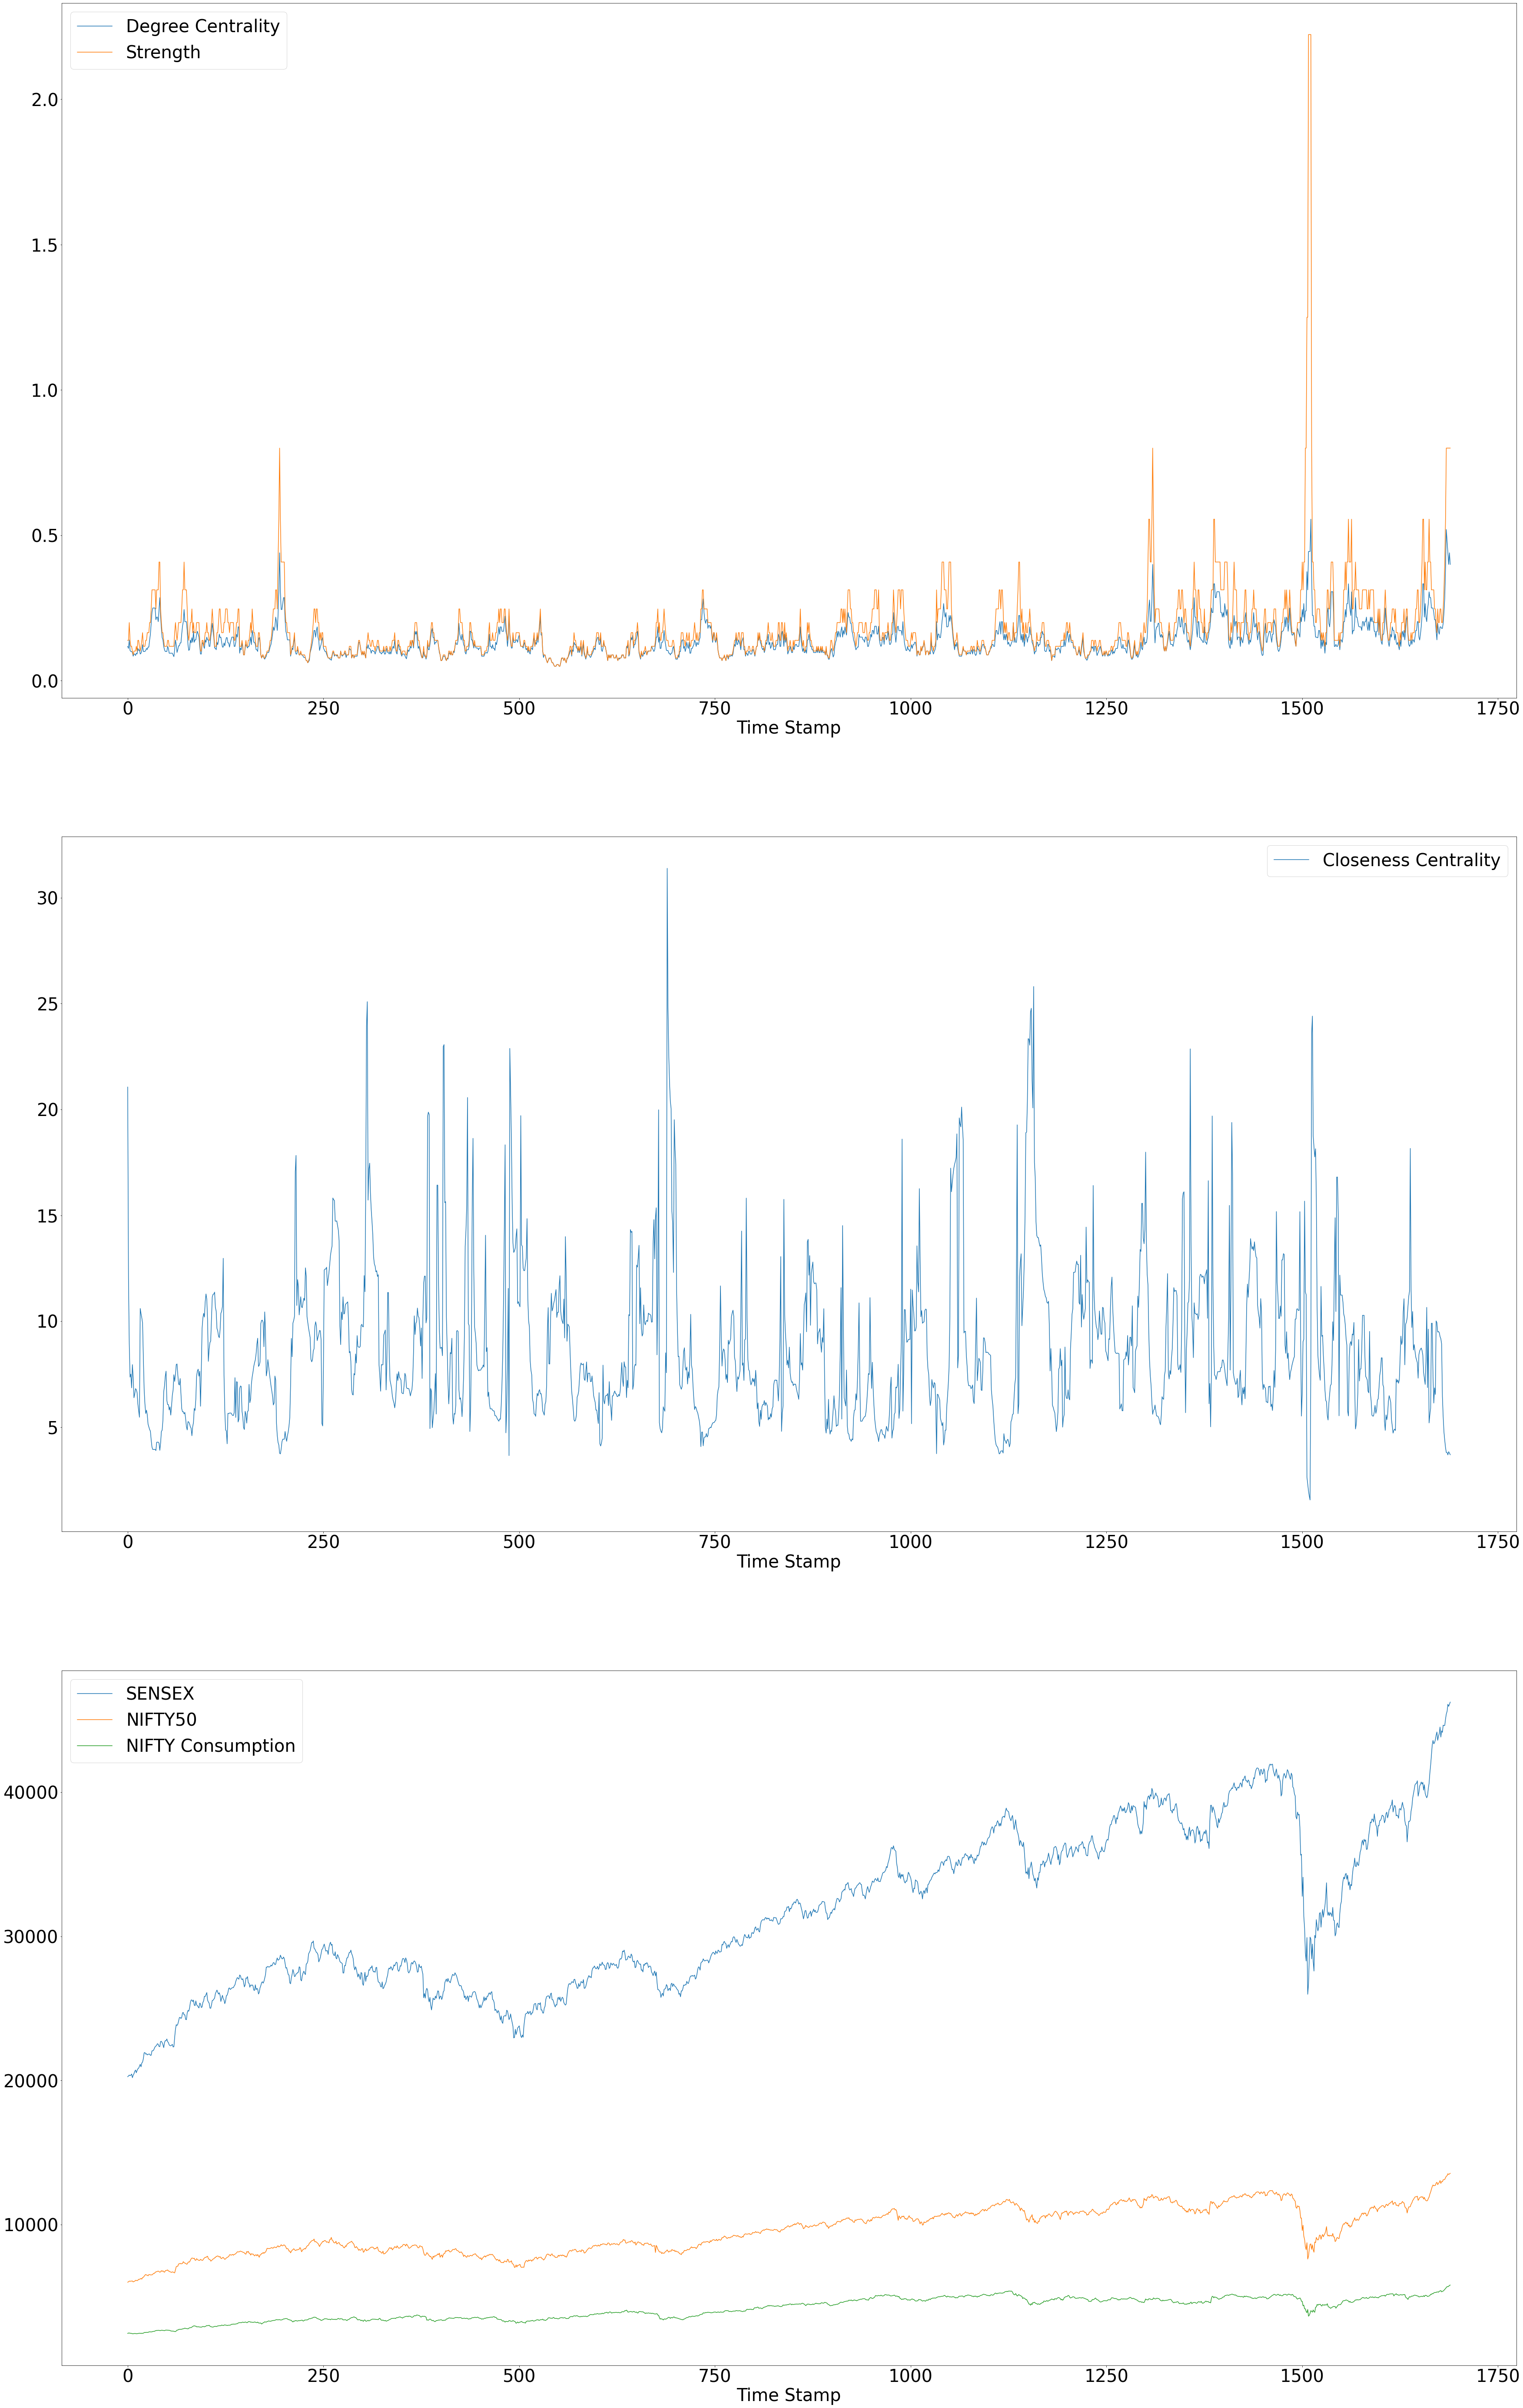

In [321]:
plt.figure(figsize=(60, 100))
plt.rcParams['font.size'] = 40
plt.subplot(3, 1, 1)

plt.plot(train_time_axis, train_avg_degree_centralities)
plt.plot(train_time_axis, train_avg_degree_strengths)
plt.xlabel("Time Stamp")
plt.legend(["Degree Centrality", "Strength"])

plt.subplot(3, 1, 2)

plt.plot(train_time_axis, train_avg_closeness_centralities)
plt.xlabel("Time Stamp")
plt.legend(['Closeness Centrality'])

plt.subplot(3, 1, 3)

plt.plot(train_time_axis, train_sensex_closing_prices)
plt.plot(train_time_axis, train_nifty_closing_prices)
plt.plot(train_time_axis, train_niftyc_closing_prices)
plt.xlabel("Time Stamp")
plt.legend(['SENSEX', 'NIFTY50', 'NIFTY Consumption'])



In [322]:
train_df = train_df[train_df['Degree Centrality'] >= 0.09]

In [323]:
print(train_df.size)

8664


In [324]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn2 = KNeighborsClassifier(n_neighbors=7)
knn3 = KNeighborsClassifier(n_neighbors=7)

In [325]:
train_features = train_df[['Degree Strength', 'Degree Centrality','Closeness Centrality']]
train_target1 = train_df[['SENSEX Target pattern']]
train_target2 = train_df[['NIFTY50 Target pattern']]
train_target3 = train_df[['NIFTY Consumption Target pattern']]

In [326]:
test_features = test_df[['Degree Strength', 'Degree Centrality', 'Closeness Centrality']]
test_target1 = test_df[['SENSEX Target pattern']]
test_target2 = test_df[['NIFTY50 Target pattern']]
test_target3 = test_df[['NIFTY Consumption Target pattern']]

In [327]:
knn1.fit(train_features, train_target1)
knn2.fit(train_features, train_target2)
knn3.fit(train_features, train_target3)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [328]:
pred1 = knn1.predict(test_features)
pred2 = knn2.predict(test_features)
pred3 = knn3.predict(test_features)

In [329]:
print(classification_report(pred1, test_target1))
print(classification_report(pred2, test_target2))
print(classification_report(pred3, test_target3))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       238
           1       0.61      0.55      0.58       325

    accuracy                           0.54       563
   macro avg       0.53      0.53      0.53       563
weighted avg       0.55      0.54      0.54       563

              precision    recall  f1-score   support

           0       0.46      0.51      0.48       239
           1       0.60      0.55      0.57       324

    accuracy                           0.53       563
   macro avg       0.53      0.53      0.53       563
weighted avg       0.54      0.53      0.54       563

              precision    recall  f1-score   support

           0       0.37      0.47      0.41       208
           1       0.63      0.53      0.58       355

    accuracy                           0.51       563
   macro avg       0.50      0.50      0.49       563
weighted avg       0.53      0.51      0.52       563



In [244]:
logr1 = LogisticRegression(random_state=42)
logr2 = LogisticRegression(random_state=42)
logr3 = LogisticRegression(random_state=42)

In [203]:
parameter_grid_logistic_regression = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logistic_Model_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), 
                                   param_grid=parameter_grid_logistic_regression, verbose=1,
                                    cv=10, n_jobs=-1)

In [204]:
logistic_Model_grid.fit(train_features, train_target1)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1234), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [205]:
prediopt = logistic_Model_grid.predict(test_features)

In [206]:
print(classification_report(prediopt, test_target1))

              precision    recall  f1-score   support

           0       0.32      0.54      0.40       158
           1       0.76      0.56      0.64       411

    accuracy                           0.55       569
   macro avg       0.54      0.55      0.52       569
weighted avg       0.64      0.55      0.58       569



In [245]:
logr1.fit(train_features, train_target1)
logr2.fit(train_features, train_target2)
logr3.fit(train_features, train_target3)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [246]:
predicted1 = logr1.predict(test_features)
predicted2 = logr2.predict(test_features)
predicted3 = logr3.predict(test_features)

In [247]:
print(classification_report(predicted1, test_target1))
print(classification_report(predicted2, test_target2))
print(classification_report(predicted3, test_target3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       569

    accuracy                           0.53       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.53      0.69       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.70       569

    accuracy                           0.53       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.53      0.70       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71       569

    accuracy                           0.55       569
   macro avg       0.50      0.28      0.35       569
weighted avg       1.00      0.55      0.71       569



C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

In [210]:
clf1 = SVC(kernel='poly', degree=5)
clf2 = SVC(kernel='poly', degree=5)
clf3 = SVC(kernel='poly', degree=5)

In [211]:
clf1.fit(train_features, train_target1)
clf2.fit(train_features, train_target2)
clf3.fit(train_features, train_target3)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=5, kernel='poly')

In [212]:
predi1 = clf1.predict(test_features)
predi2 = clf2.predict(test_features)
predi3 = clf3.predict(test_features)

In [213]:
print(classification_report(predi1, test_target1))
print(classification_report(predi2, test_target2))
print(classification_report(predi3, test_target3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       569

    accuracy                           0.53       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.53      0.69       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       569

    accuracy                           0.54       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.54      0.70       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71       569

    accuracy                           0.55       569
   macro avg       0.50      0.28      0.36       569
weighted avg       1.00      0.55      0.71       569



C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

In [214]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [215]:
dt1.fit(train_features, train_target1)
dt2.fit(train_features, train_target2)
dt3.fit(train_features, train_target3)

DecisionTreeClassifier()

In [216]:
dtpred1 = dt1.predict(test_features)
dtpred2 = dt2.predict(test_features)
dtpred3 = dt3.predict(test_features)

In [217]:
print(classification_report(dtpred1, test_target1))
print(classification_report(dtpred2, test_target2))
print(classification_report(dtpred3, test_target3))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       274
           1       0.54      0.55      0.55       295

    accuracy                           0.52       569
   macro avg       0.52      0.52      0.52       569
weighted avg       0.52      0.52      0.52       569

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       228
           1       0.64      0.57      0.61       341

    accuracy                           0.55       569
   macro avg       0.55      0.55      0.55       569
weighted avg       0.57      0.55      0.56       569

              precision    recall  f1-score   support

           0       0.62      0.46      0.53       341
           1       0.42      0.58      0.49       228

    accuracy                           0.51       569
   macro avg       0.52      0.52      0.51       569
weighted avg       0.54      0.51      0.51       569



In [218]:
mlp1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [219]:
mlp1.fit(train_features, train_target1)
mlp2.fit(train_features, train_target2)
mlp3.fit(train_features, train_target3)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [220]:
nnpred1 = mlp1.predict(test_features)
nnpred2 = mlp2.predict(test_features)
nnpred3 = mlp3.predict(test_features)

In [221]:
print(classification_report(nnpred1, test_target1))
print(classification_report(nnpred2, test_target2))
print(classification_report(nnpred3, test_target3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       569

    accuracy                           0.53       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.53      0.69       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       569

    accuracy                           0.54       569
   macro avg       0.50      0.27      0.35       569
weighted avg       1.00      0.54      0.70       569

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71       569

    accuracy                           0.55       569
   macro avg       0.50      0.28      0.36       569
weighted avg       1.00      0.55      0.71       569



C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eshub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1